In [1]:
%matplotlib widget
import numpy as np
from scipy.integrate import quad,romberg
import matplotlib.pyplot as plt

<Figure size 640x480 with 0 Axes>

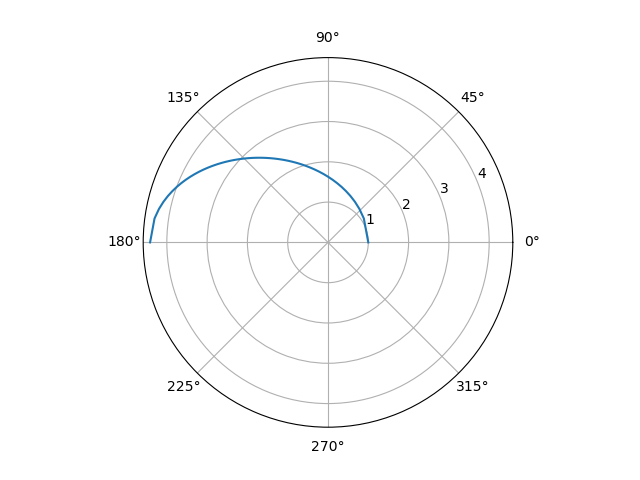

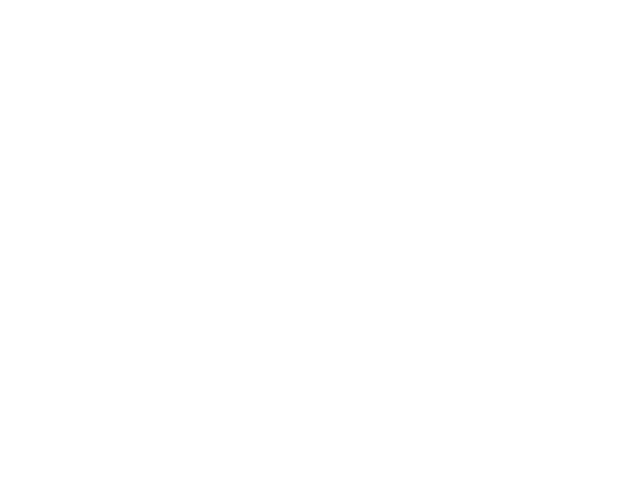

In [2]:
import numpy as np
from scipy.integrate import quad,romberg
import matplotlib.pyplot as plt

GM = 3.986004e+14
rp = 6500000
vp = 10000
# GM = 10.0
# rp = 1.0
# vp = 1.0
L = rp * vp
E0 = vp * vp / 2 - GM / rp
a = 1/(2/rp - vp*vp/GM)
e = 1 - rp/a
if e >= 1: raise Exception(e, "e >= 1")
ra = a*(1+e)

def orbit(r):
    return L / (2*E0*r**4 + 2*GM*r**3 - (L*r)**2) ** 0.5

#res = quad(orbit, rp, ra)
r = np.linspace(rp, ra, 50)
o = np.array([quad(orbit, rp, ri)[0] if ri != rp else 0 for ri in r])
plt.polar(o, r / 6500000)
plt.figure(f"Orbit, V: {vp}")
#plt.show()

In [3]:
(o * 180 / np.pi, r)
#r / 6500000

(array([  0.        ,  33.74572881,  46.87139956,  56.43960161,
         64.13479279,  70.62523678,  76.26040997,  81.25119124,
         85.73667017,  89.81435756,  93.55573085,  97.01500171,
        100.23441276, 103.24761362, 106.08190708, 108.75979728,
        111.30008882, 113.71868687, 116.02919263, 118.24335509,
        120.37141973, 122.42240216, 124.40430605, 126.32429944,
        128.18885949, 130.0038933 , 131.77484076, 133.50676377,
        135.20442577, 136.87236461, 138.51496185, 140.13651116,
        141.74128902, 143.33363121, 144.9180195 , 146.49918457,
        148.08223344, 149.67281374, 151.27733381, 152.90326872,
        154.55960267, 156.25749585, 158.01133875, 159.84051679,
        161.77258159, 163.84950771, 166.14175513, 168.78684468,
        172.14133435, 180.        ]),
 array([ 6500000.        ,  6953107.95227488,  7406215.90454976,
         7859323.85682465,  8312431.80909953,  8765539.76137441,
         9218647.7136493 ,  9671755.66592418, 10124863.61819906,

In [5]:
E0 = 0
L = 0
M = 0
drdt = (E0**2 - (1 - 2*M/r)*(1 + L**2/r**2))**0.5
dodt = L/r**2

/run/user/1000/ipykernel_19060/3170683634.py:4: RuntimeWarning: invalid value encountered in true_divide
  drdt = (E0**2 - (1 - 2*M/r)*(1 + L**2/r**2))**0.5
/run/user/1000/ipykernel_19060/3170683634.py:4: RuntimeWarning: invalid value encountered in sqrt
  drdt = (E0**2 - (1 - 2*M/r)*(1 + L**2/r**2))**0.5
/run/user/1000/ipykernel_19060/3170683634.py:5: RuntimeWarning: invalid value encountered in true_divide
  dodt = L/r**2


In [6]:
%matplotlib widget
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

In [7]:
%matplotlib widget
# G = M = c = 1
# m = 0.01 * M
# r0 = 10 * rs
# v = 0.18 # v is perpendicular to r
G = 6.67e-11
M = 2e30
c = 300000000
m = 3.33e23
r0 = 57909227000
v = 47360

rs = 2 * G * M / c**2
gamma = (1 - (v / c)**2) ** -0.5
mu = m * M / (m + M)

L = r0 * v * gamma * m
h = L / mu

# m = 0
# Erest = m * c**2
# Ekin = (gamma - 1) * m * c**2
# Epot = ((1 - rs/r)**0.5 - 1) * gamma * m * c**2
# E = Erest + Ekin + Epot
E = (1 - rs/r0)**0.5 * gamma * c**2 * m
a = h / c
b = h * m * c / E

arr = 1/np.roots([a*a*b*b*rs, -a*a*b*b, b*b*rs, a*a-b*b])
ra = arr[2].real - 10
if np.iscomplex(arr).any():
    rp = rs
else:
    arr.sort()
    rp = arr[1]
    #ra = arr[2]
print(r0, rs, arr)
# def orbit(r):
#     l = E**2/c**2 - (1 - rs/r) * (c**2 + h**2/r**2)
#     if l < 0:
#         print(l, r)
#         return
#     l = 1 / l**0.5
#     return l
def orbit(r):
    l = 1/b**2 - (1 - rs/r) * (1/a**2 + 1/r**2)
    #print(r, l, "Error!" if l <= 0 else "")
    if l <= 0:
        print(r, l, "Error!")
        return 0
        raise Exception("l<0", l)
    l = 1 / r ** 2 / l**0.5
    return l

print("Intergral:", quad(orbit, rp, r0))

# koef = 1
# r = np.linspace(ra**(1/koef), rp**(1/koef), 5000)**koef
# o = np.array([quad(orbit, ri, ra)[0] if ri != r0 else 0 for ri in r])

# # black hole
# plt.polar(np.linspace(0, 2*np.pi, 45), [rs]*45)

# def kepler_orbit():
#     L = r0 * v
#     E = v * v / 2 - G * M / r0
#     p = L * L / G / M
#     a = 1/(2/r0 - v*v/G/M)
#     e = r0/a - 1
#     o = np.linspace(0, 2*np.pi, 360)
#     plt.polar(o, p / (1 - e * np.cos(o)))

# kepler_orbit()
# plt.polar(o, r, 'black')
# plt.show()


57909227000 2964.4444444444443 [2.96444476e+03 5.49391860e+10 5.79088673e+10]
57909025462.439865 -4.417621069237666e-29 Error!
57909126231.21993 -7.415292509077511e-29 Error!
57908924270.78122 -1.735493991486226e-29 Error!
57909176615.60997 -8.67746995743113e-29 Error!
57909075635.39061 -5.837570698635487e-29 Error!
57909201807.804985 -9.308558681607939e-29 Error!
57909151317.695305 -7.888609052210118e-29 Error!
57909214403.90249 -9.781875224740546e-29 Error!
57909024426.64661 -4.417621069237666e-29 Error!
57909189158.84765 -9.150786500563737e-29 Error!
57909031312.82584 -4.5753932502818685e-29 Error!
57909220701.95125 -9.939647405784749e-29 Error!
57909125713.3233 -7.257520328033309e-29 Error!
57908909138.50711 -1.262177448353619e-29 Error!
54939189153.8986 -1.5777218104420236e-30 Error!
57909208079.42383 -9.466330862652142e-29 Error!
57909129156.41292 -7.415292509077511e-29 Error!
57908994537.42071 -3.6287601640166543e-29 Error!
57909223850.975624 -9.939647405784749e-29 Error!
579091

/run/user/1000/ipykernel_19060/2524473824.py:55: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  print("Intergral:", quad(orbit, rp, r0))


ValueError: x and y must have same first dimension, but have shapes (50,) and (10000001,)

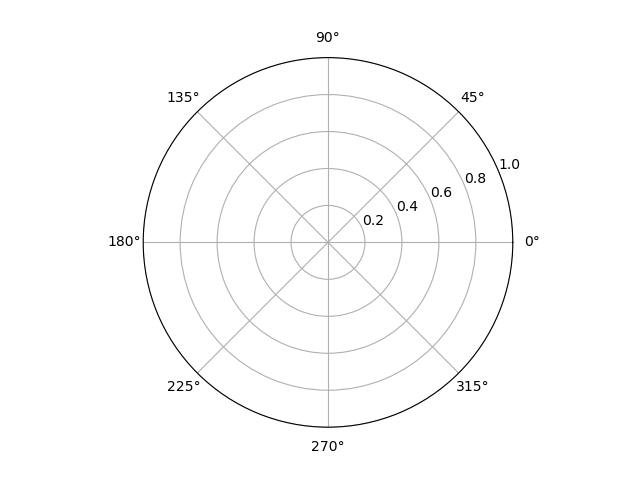

In [8]:
plt.polar(o, r, 'black')
plt.show()